In [103]:
import pandas as pd
import numpy as np
import pickle

import math
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
# Set font file path
font_path = '/data/XXX/ttf/ARIAL.TTF'

from collections import Counter
from itertools import chain
from scipy.optimize import curve_fit
import powerlaw

from rapidfuzz import process, fuzz
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('/data/huggingface/hub/sentence-transformers_all-MiniLM-L6-v2')
import oracledb
connection = oracledb.connect(user="", password="", host="",port="",service_name="")

import oracledb
from sqlalchemy import create_engine
import cx_Oracle
from tqdm import tqdm
# 第一次要运行这句
# 下载地址 https://www.oracle.com/database/technologies/instant-client/winx64-64-downloads.html
# 下载Basic Package
# cx_Oracle.init_oracle_client(lib_dir= r"/data/cx_oracle/instantclient-basic-linux.x64-12.2.0.1.0/instantclient_12_2")

from matplotlib.font_manager import FontProperties

from sentence_transformers.util import cos_sim
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from powerlaw import Fit, plot_pdf

from tqdm import tqdm
import re
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_curve,precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
# 下载NLTK的punkt数据
nltk.download('punkt')
stemmer = PorterStemmer()
def get_dict(x,dictionary):
    return [dictionary[str(item)] for item in x]
def get_larger(x,number):
    return [item for item in x if item>number]
def compare_larger(x,number):
    return any([item>number for item in x])
def convert_date(x):
    try:
        date=pd.Timestamp(x)
    except:
        date=pd.Timestamp(x.split('-')[0]+'-01-01')
    return date
def Word_overlap_score(x, y):
    # Add a check to ensure x and y are strings
    if not isinstance(x, str) or not isinstance(y, str):
        return 0  # or any other value that makes sense in your context

    token_x = [stemmer.stem(token) for token in word_tokenize(x)]
    token_y = [stemmer.stem(token) for token in word_tokenize(y)]
    return len([i for i in token_x if i in token_y])
with open('model/model_5','rb') as f:
    Logistic_model=pickle.load(f)

[nltk_data] Error loading punkt: <urlopen error [Errno 111] Connection
[nltk_data]     refused>


In [2]:
# df_ppp=pd.read_pickle('version_3/df_ppp.pickle')
# df_paper=pd.read_pickle('version_3/df_paper.pickle')
# df_patent=pd.read_pickle('version_3/df_patent.pickle')


In [3]:
# df_paper_eid_abs = pd.read_sql(sql='SELECT t.* FROM "df_paper_eid_abs" t', con=connection)
# df_paper_eid_abs=df_paper_eid_abs.drop_duplicates('eid')
# df_paper_eid_abs

In [4]:
# df_patent_appln_id_abs = pd.read_sql(sql='SELECT t.* FROM "df_patent_appln_id_abs" t', con=connection)
# df_patent_appln_id_abs=df_patent_appln_id_abs.drop_duplicates('appln_id')
# df_patent_appln_id_abs['appln_id']=df_patent_appln_id_abs['appln_id'].astype(str)
# df_patent_appln_id_abs

In [5]:
# df_paper_eid_abs['description_embedding']=list(model.encode(df_paper_eid_abs['description'].astype(str).tolist(),show_progress_bar=True,convert_to_numpy=True))
# df_patent_appln_id_abs['appln_abstract_embedding']=list(model.encode(df_patent_appln_id_abs['appln_abstract'].astype(str).tolist(),show_progress_bar=True,convert_to_numpy=True))

In [6]:
# df_patent_appln_id_abs.to_pickle('version_3/df_patent_appln_id_abs.pickle')
# df_paper_eid_abs.to_pickle('version_3/df_paper_eid_abs.pickle')

In [7]:
# df_patent_appln_id_abs=pd.read_pickle('version_3/df_patent_appln_id_abs.pickle')
# df_paper_eid_abs=pd.read_pickle('version_3/df_paper_eid_abs.pickle')

In [8]:
# df_ppp=df_ppp.merge(df_paper_eid_abs,left_on='eid',right_on='eid',how='inner')
# df_ppp=df_ppp.merge(df_patent_appln_id_abs,left_on='appln_id',right_on='appln_id',how='inner')

In [9]:
# df_ppp.to_pickle('version_3/df_ppp2.pickle')

In [10]:
# # 假设 original_df 是你的原始 DataFrame
# # 按行拆分的大小（每个小DataFrame的行数）
# chunk_size = 1000

# # 获取原始DataFrame的行数
# total_rows = len(df_ppp)

# # 计算要拆分的小DataFrame的数量
# num_chunks = (total_rows // chunk_size) + 1

# # 拆分DataFrame为小DataFrame列表
# small_dfs = [df_ppp.iloc[i * chunk_size:(i + 1) * chunk_size] for i in range(num_chunks)]

# final_dfs=[]
# # small_dfs 现在包含了原始DataFrame拆分后的多个小DataFrame
# pd.options.mode.chained_assignment = None  # 禁用警告
# threshold=0.5213402455879239
# for df_item in tqdm(small_dfs):
#     temp=[cos_sim(x,y)[0][0] for x,y in zip(df_item['title_patent_embedding'],df_item['title_paper_embedding'])]
#     df_item['simility']=temp

#     temp_abs=[cos_sim(x,y)[0][0] for x,y in zip(df_item['appln_abstract_embedding'],df_item['description_embedding'])]
#     df_item['simility_abstract']=temp_abs 
    
#     df_item['Word_overlap_score'] = df_item.apply(lambda row: Word_overlap_score(row['title_patent'], row['title_paper']), axis=1)
#     df_item['Word_overlap_score_abs'] = df_item.apply(lambda row: Word_overlap_score(row['description'], row['appln_abstract']), axis=1)

#     X = df_item[['Word_overlap_score', 'simility','simility_abstract']]
#     y_pred = (Logistic_model.predict_proba(X)[:, 1] > threshold).astype(int)
#     df_item['y_pred']=y_pred 
#     df_item=df_item[df_item['y_pred']==1]
#     final_dfs.append(df_item)

In [11]:
df_paper=pd.read_pickle('version_3/df_paper.pickle')
df_patent=pd.read_pickle('version_3/df_patent.pickle')

In [12]:
import os

In [13]:
df_ppp=pd.concat([pd.read_pickle('df_ppp_part/'+i) for i in os.listdir('df_ppp_part')])
df_ppp

,author_id,person_id,appln_id,eid,title_patent,title_patent_embedding,title_paper,title_paper_embedding,description,description_embedding,appln_abstract,appln_abstract_embedding,simility,simility_abstract,Word_overlap_score,Word_overlap_score_abs,y_pred
50001009,55930737700,18736433,340865358,2-s2.0-84894073070,Preparation method of Chinese medicinal lotion...,"[0.047257368, 0.08937087, 0.017898748, -0.0072...",Pharmacokinetics of pilsicainide hydrochloride...,"[0.030963782, -0.05763826, -0.015854826, 0.027...",Background Pilsicainide hydrochloride is a cla...,"[0.0016638244, -0.030240405, -0.04197745, -0.0...",The invention provides a preparation method of...,"[-0.01056498, 0.0155358855, -0.010941762, -0.0...",tensor(0.2908),tensor(0.3583),3,153,1
50001077,56345629300,18736433,340865358,2-s2.0-85055279960,Preparation method of Chinese medicinal lotion...,"[0.047257368, 0.08937087, 0.017898748, -0.0072...",Pharmacokinetics and efficacy of orally admini...,"[-7.4038627e-07, -0.07131078, 0.00021844376, 0...",Inflammatory bowel disease is a chronic inflam...,"[-0.046331923, -0.08326523, 0.02728783, -0.023...",The invention provides a preparation method of...,"[-0.01056498, 0.0155358855, -0.010941762, -0.0...",tensor(0.2517),tensor(0.2646),1,70,1
50001080,56345629300,18736433,340865358,2-s2.0-85011949868,Preparation method of Chinese medicinal lotion...,"[0.047257368, 0.08937087, 0.017898748, -0.0072...",Arginine-Modified Nanostructured Lipid Carrier...,"[-0.0036178257, -0.027868774, -0.06069956, 0.0...",The ability to escape endo/lysosomal trafficki...,"[0.0010349173, -0.1168832, -0.03301104, 0.0129...",The invention provides a preparation method of...,"[-0.01056498, 0.0155358855, -0.010941762, -0.0...",tensor(0.2546),tensor(0.1703),1,70,1
50001086,56345629300,18736433,340865358,2-s2.0-84855722431,Preparation method of Chinese medicinal lotion...,"[0.047257368, 0.08937087, 0.017898748, -0.0072...",Redox-sensitive micelles self-assembled from a...,"[0.033132274, -0.10300347, 0.0059931325, 0.022...",A targeted intracellular delivery system of pa...,"[0.024816157, -0.08571341, -0.013220866, 0.020...",The invention provides a preparation method of...,"[-0.01056498, 0.0155358855, -0.010941762, -0.0...",tensor(0.1899),tensor(0.1752),2,44,1
50001092,56345629300,18736433,340865358,2-s2.0-84988862032,Preparation method of Chinese medicinal lotion...,"[0.047257368, 0.08937087, 0.017898748, -0.0072...",Biomimetic HDL nanoparticle mediated tumor tar...,"[0.03478045, -0.041550487, 0.01789038, 0.04812...",Photodynamic therapy has emerged as a promisin...,"[-0.005155638, -0.074336275, -0.0059859226, 0....",The invention provides a preparation method of...,"[-0.01056498, 0.0155358855, -0.010941762, -0.0...",tensor(0.2262),tensor(0.0888),2,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19999967,54393766600,18728140,439345250,2-s2.0-85080045335,Pharmaceutical composition used for treating s...,"[0.044631824, -0.08122243, 0.004229384, -0.010...",Structure and allergenicity assessments of bov...,"[0.01764793, -0.1827245, -0.026199808, 0.04576...",Bovine β-lactoglobulin (β-LG) is recognized as...,"[0.020626275, -0.19711255, 0.032997265, 0.0332...",The invention provides a pharmaceutical compos...,"[-0.033771653, -0.074083395, -0.068660475, -0....",tensor(0.1562),tensor(0.1230),3,55,1
19999971,54393766600,18728140,439345250,2-s2.0-85139400337,Pharmaceutical composition used for treating s...,"[0.044631824, -0.08122243, 0.004229384, -0.010...",Potential allergenicity and hydrolysis assessm...,"[-0.03135909, -0.12170162, 0.039406445, 0.0275...",Casein is one of the main allergens in cow's m...,"[-0.026895795, -0.116701126, -0.0055088974, -0...",The invention provides a pharmaceutical compos...,"[-0.033771653, -0.074083395, -0.068660475, -0....",tensor(0.2486),tensor(0.2608),2,85,1
19999983,54393766600,18728140,439345250,2-s2.0-85024503739,Pharmaceutical composition used for treating s...,"[0.044631824, -0.08122243, 0.004229

In [14]:
df_patent['PPP']=np.where(df_patent['appln_id'].isin(df_ppp['appln_id']),1,0)
df_paper['PPP']=np.where(df_paper['eid'].isin(df_ppp['eid']),1,0)


In [15]:
print('author_id number--',len(df_ppp['author_id'].unique()))
print('person_id number--',len(df_ppp['person_id'].unique()))
print('appln_id number--',len(df_ppp['appln_id'].unique()))
print('total appln_id number--',len(df_patent['appln_id'].unique()))
print('eid number--',len(df_ppp['eid'].unique()))
print('total eid number--',len(df_paper['eid'].unique()))
print('paper-patent pair number--',len(df_ppp.drop_duplicates(['appln_id','eid'])))


author_id number-- 62840
person_id number-- 71032
appln_id number-- 164711
total appln_id number-- 211123
eid number-- 1936952
total eid number-- 3270371
paper-patent pair number-- 9534029


In [45]:
df_match_result_with_address=pd.read_pickle('data/version/version_v1/df_all.pickle')
df_match_result_with_address

,labels,author_id,psn_id_matching,psn_id_matching_name,scopus_matching_name,appln_id_matching,eid_matching,doi_matching,title_scopus_matching,title_patstat_matching,...,affiliation_city,affiliation_country,affilname,invent_0_psn_name_encoding,invent_0_person_address_encoding,person_address_encoding,affilname_encoding,invent_0_psn_name_similarity,invent_0_person_address_similarity,person_address_similarity
0,4387,7004114700,22531991,Morimura Shigeru,"Morimura, Shigeru",37450113,2-s2.0-4544254605,10.1271/bbb.68.551,In vitro evaluation of physiological activity ...,FERMENTED VINEGAR AND METHOD FOR PRODUCING THE...,...,"[Kumamoto, Kumamoto]","[Japan, Japan]","[Kumamoto University, Kumamoto University Scho...","[-0.0642979, -0.02824022, 0.045258436, -0.0351...","[-0.06429788, -0.028240232, 0.04525844, -0.035...","[0.0024044747, -0.04070058, -0.076731235, 0.01...","[[-0.029006729, 0.04481186, 0.043255184, -0.01...","[0.28137732, 0.22222334]","[0.28137738, 0.22222337]","[0.109581254, 0.057689425]"
1,4387,7101829857,29764767,Shigematsu Toru,"Shigematsu, Toru",37450113,2-s2.0-4544254605,10.1271/bbb.68.551,In vitro evaluation of physiological activity ...,FERMENTED VINEGAR AND METHOD FOR PRODUCING THE...,...,"[Tsukuba, Tsukuba, Kumamoto, Niigata, Tokyo, T...","[Japan, Japan, Japan, Japan, Japan, Japan, Japan]",[National Institute of Advanced Industrial Sci...,"[-0.0642979, -0.02824022, 0.045258436, -0.0351...","[-0.0642979, -0.02824022, 0.045258436, -0.0351...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[[-0.1368436, 0.0103607, -0.06177567, 0.007020...","[0.14725946, 0.24151072, 0.28137735, 0.1459187...","[0.14725946, 0.24151072, 0.28137735, 0.1459187...","[0.08167138, 0.33279568, 0.10958125, 0.0548881..."
2,4387,7102429514,16955768,Kida Kenji,"Kida, Kenji",37450113,2-s2.0-4544254605,10.1271/bbb.68.551,In vitro evaluation of physiological activity ...,FERMENTED VINEGAR AND METHOD FOR PRODUCING THE...,...,"[Chengdu, Kumamoto, Minato]","[China, Japan, Japan]","[Sichuan University, Kumamoto University, Toky...","[-0.0642979, -0.02824022, 0.045258436, -0.0351...","[-0.0642979, -0.02824022, 0.045258436, -0.0351...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[[-0.090305276, -0.019451186, -0.029335128, 0....","[0.3072466, 0.28137735, 0.19965106]","[0.3072466, 0.28137735, 0.19965106]","[0.12365728, 0.10958126, 0.051470563]"
3,651,57632820300,36079383,Yamamoto; Itsuo,"Yamamoto, Itsuo",52568004,2-s2.0-0031763766,10.1080/028418698430458,"Relevance of a new impedance matching, or subt...",Apparatus for high-frequency hyperthermia,...,"[Osaka, Osaka]","[Japan, Japan]","[Yamamoto Vinita Co. Ltd., Yamamoto Vinyter Co...","[-0.12813604, 0.085849494, -0.04739462, 0.0122...","[-0.020274319, -0.005732855, 0.014040356, 0.00...","[-0.0202743, -0.005732823, 0.014040347, 0.0098...","[[-0.13479866, 0.043942463, -0.029102277, 0.02...","[0.64877623, 0.6102642]","[0.37098807, 0.2993205]","[0.3709881, 0.29932055]"
4,651,57632820300,36079383,Yamamoto; Itsuo,"Yamamoto, Itsuo",52568004,2-s2.0-0031763766,10.1080/028418698430458,"Relevance of a new impedance matching, or subt...",Apparatus for high-frequency hyperthermia,...,"[Osaka, Osaka]","[Japan, Japan]","[Yamamoto Vinita Co. Ltd., Yamamoto Vinyter Co...","[-0.093497746, 0.03521996, -0.05208922, 0.0552...","[-0.09801738, 0.049089376, -0.039831735, -0.01...","[-0.0202743, -0.005732823, 0.014040347, 0.0098...","[[-0.13479866, 0.043942463, -0.029102277, 0.02...","[0.31797183, 0.2230064]","[0.27716115, 0.22692895]","[0.3709881, 0.29932055]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797731,3376,56256023400,24548116,"Otsuki, Junko","Otsuki, Junko",524285915,2-s2.0-85081307887,10.1002/rmb2.12322,Predictive factors influencing pregnancy rate ...,ANALYSIS SOFTWARE AND DEVICE FOR EMBRYO SELECTION,...,"[Ibaraki, Saitama, Kobe, Okayama, Okayama, Tok...","[Japan, Japan, Japan, Japan, Japan, Japan, Jap...","[National Institute of Biomedical Innovation, ...","[-0.

In [47]:
t0=df_match_result_with_address.drop_duplicates('author_id')
t0

,labels,author_id,psn_id_matching,psn_id_matching_name,scopus_matching_name,appln_id_matching,eid_matching,doi_matching,title_scopus_matching,title_patstat_matching,...,affiliation_city,affiliation_country,affilname,invent_0_psn_name_encoding,invent_0_person_address_encoding,person_address_encoding,affilname_encoding,invent_0_psn_name_similarity,invent_0_person_address_similarity,person_address_similarity
0,4387,7004114700,22531991,Morimura Shigeru,"Morimura, Shigeru",37450113,2-s2.0-4544254605,10.1271/bbb.68.551,In vitro evaluation of physiological activity ...,FERMENTED VINEGAR AND METHOD FOR PRODUCING THE...,...,"[Kumamoto, Kumamoto]","[Japan, Japan]","[Kumamoto University, Kumamoto University Scho...","[-0.0642979, -0.02824022, 0.045258436, -0.0351...","[-0.06429788, -0.028240232, 0.04525844, -0.035...","[0.0024044747, -0.04070058, -0.076731235, 0.01...","[[-0.029006729, 0.04481186, 0.043255184, -0.01...","[0.28137732, 0.22222334]","[0.28137738, 0.22222337]","[0.109581254, 0.057689425]"
1,4387,7101829857,29764767,Shigematsu Toru,"Shigematsu, Toru",37450113,2-s2.0-4544254605,10.1271/bbb.68.551,In vitro evaluation of physiological activity ...,FERMENTED VINEGAR AND METHOD FOR PRODUCING THE...,...,"[Tsukuba, Tsukuba, Kumamoto, Niigata, Tokyo, T...","[Japan, Japan, Japan, Japan, Japan, Japan, Japan]",[National Institute of Advanced Industrial Sci...,"[-0.0642979, -0.02824022, 0.045258436, -0.0351...","[-0.0642979, -0.02824022, 0.045258436, -0.0351...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[[-0.1368436, 0.0103607, -0.06177567, 0.007020...","[0.14725946, 0.24151072, 0.28137735, 0.1459187...","[0.14725946, 0.24151072, 0.28137735, 0.1459187...","[0.08167138, 0.33279568, 0.10958125, 0.0548881..."
2,4387,7102429514,16955768,Kida Kenji,"Kida, Kenji",37450113,2-s2.0-4544254605,10.1271/bbb.68.551,In vitro evaluation of physiological activity ...,FERMENTED VINEGAR AND METHOD FOR PRODUCING THE...,...,"[Chengdu, Kumamoto, Minato]","[China, Japan, Japan]","[Sichuan University, Kumamoto University, Toky...","[-0.0642979, -0.02824022, 0.045258436, -0.0351...","[-0.0642979, -0.02824022, 0.045258436, -0.0351...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[[-0.090305276, -0.019451186, -0.029335128, 0....","[0.3072466, 0.28137735, 0.19965106]","[0.3072466, 0.28137735, 0.19965106]","[0.12365728, 0.10958126, 0.051470563]"
3,651,57632820300,36079383,Yamamoto; Itsuo,"Yamamoto, Itsuo",52568004,2-s2.0-0031763766,10.1080/028418698430458,"Relevance of a new impedance matching, or subt...",Apparatus for high-frequency hyperthermia,...,"[Osaka, Osaka]","[Japan, Japan]","[Yamamoto Vinita Co. Ltd., Yamamoto Vinyter Co...","[-0.12813604, 0.085849494, -0.04739462, 0.0122...","[-0.020274319, -0.005732855, 0.014040356, 0.00...","[-0.0202743, -0.005732823, 0.014040347, 0.0098...","[[-0.13479866, 0.043942463, -0.029102277, 0.02...","[0.64877623, 0.6102642]","[0.37098807, 0.2993205]","[0.3709881, 0.29932055]"
7,651,7005737279,27394585,"Robins, H. Ian","ROBINS, H. IAN",46482242,2-s2.0-0025534541,10.1007/978-1-4684-5766-7_17,Radiant heat systemic hyperthermia clinical tr...,Apparatus for inducing whole body hyperthermia...,...,"[Madison, Madison, Madison, Madison, Madison, ...","[United States, United States, United States, ...","[UW Health, University of Wisconsin-Madison, U...","[-0.040514436, 0.057535153, -0.048996057, -0.0...","[0.08636302, -0.01988334, 0.0714937, 0.0488145...","[0.010685794, -0.028812902, -0.0055484236, 0.0...","[[-0.018823976, 0.052440602, -0.05212286, 0.08...","[0.31008786, 0.36234215, 0.6613666, 0.28220242...","[0.20971116, 0.35216755, 0.13287245, 0.340376,...","[0.14939798, 0.70395213, 0.3404087, 0.4607318,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1797720,3376,57221560127,19309318,Li Li,"Li, Li",502141394,2-s2.0-85113759185,10.1186/s12958-021-00819-9,Immediate versus delayed frozen embryo transfe...,Embryo transfer is with picking up embryo ware,...,[Jinan],[China],

In [48]:
df_ppp.columns

Index(['author_id', 'person_id', 'appln_id', 'eid', 'title_patent',
       'title_patent_embedding', 'title_paper', 'title_paper_embedding',
       'description', 'description_embedding', 'appln_abstract',
       'appln_abstract_embedding', 'simility', 'simility_abstract',
       'Word_overlap_score', 'Word_overlap_score_abs', 'y_pred',
       'appln_filing_date', 'appln_filing_year', 'appln_auth', 'coverDate',
       'time_lag'],
      dtype='object')

In [52]:
df_ppp['PPP_item']=df_ppp.apply(lambda row: (row['appln_id'], row['eid']), axis=1)

In [92]:
print('Doudna, Jennifer A.:',len(df_ppp[df_ppp['author_id']=='7006285665']))
print('Doudna, Jennifer A.:',len(df_ppp[df_ppp['author_id']=='7006285665']['eid'].unique()))
print('Doudna, Jennifer A.:',len(df_ppp[df_ppp['author_id']=='7006285665']['appln_id'].unique()))

Doudna, Jennifer A.: 530
Doudna, Jennifer A.: 226
Doudna, Jennifer A.: 3


In [94]:
print('Zhang Feng:',len(df_ppp[df_ppp['author_id']=='55613230891']))
print('Zhang Feng:',len(df_ppp[df_ppp['author_id']=='55613230891']['eid'].unique()))
print('Zhang Feng:',len(df_ppp[df_ppp['author_id']=='55613230891']['appln_id'].unique()))

Zhang Feng: 1578
Zhang Feng: 265
Zhang Feng: 144


In [102]:
df_match_result_with_address[df_match_result_with_address['author_id']=='55613230891']

,labels,author_id,psn_id_matching,psn_id_matching_name,scopus_matching_name,appln_id_matching,eid_matching,doi_matching,title_scopus_matching,title_patstat_matching,...,affiliation_city,affiliation_country,affilname,invent_0_psn_name_encoding,invent_0_person_address_encoding,person_address_encoding,affilname_encoding,invent_0_psn_name_similarity,invent_0_person_address_similarity,person_address_similarity
30669,3041,55613230891,37053597,Zhang Feng,"Zhang, Feng",273613493,2-s2.0-33749037696,10.1097/01.sap.0000237577.07219.b6,Luminal fillers in nerve conduits for peripher...,Artificial silk fibroin nano-fiber nerve repai...,...,"[Shanghai, Shanghai, Shanghai, Shanghai, Unive...","[China, China, China, China, United States, Ch...","[Fudan University, gica, Universidade Nova de ...","[-0.053623915, 0.010783268, 0.03569593, 0.0489...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[[-0.024921758, 0.067075305, -0.061542932, 0.0...","[0.5737901, 0.34063482, 0.24581449, 0.40737954...","[0.14074278, 0.14695749, 0.1571515, 0.06219877...","[0.14074278, 0.14695749, 0.1571515, 0.06219877..."
30670,3041,55613230891,37053597,Zhang Feng,"Zhang, Feng",273613493,2-s2.0-84871580541,10.1097/SAP.0b013e31826a1aff,Effect of sildenafil on peripheral nerve regen...,Artificial silk fibroin nano-fiber nerve repai...,...,"[Shanghai, Shanghai, Shanghai, Shanghai, Unive...","[China, China, China, China, United States, Ch...","[Fudan University, gica, Universidade Nova de ...","[-0.053623915, 0.010783268, 0.03569593, 0.0489...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[[-0.024921758, 0.067075305, -0.061542932, 0.0...","[0.5737901, 0.34063482, 0.24581449, 0.40737954...","[0.14074278, 0.14695749, 0.1571515, 0.06219877...","[0.14074278, 0.14695749, 0.1571515, 0.06219877..."
369990,142,55613230891,8700695,Feng Zhang,"Zhang, Feng",6851434,2-s2.0-85058074171,10.1007/s40618-018-0990-1,The MAGI2 gene polymorphism rs2160322 is assoc...,Pillow for thyroid posture,...,"[Shanghai, Shanghai, Shanghai, Shanghai, Unive...","[China, China, China, China, United States, Ch...","[Fudan University, gica, Universidade Nova de ...","[-0.021311095, 0.0994755, 0.022608139, 0.02022...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[[-0.024921758, 0.067075305, -0.061542932, 0.0...","[0.330815, 0.07252143, 0.19393744, 0.20587419,...","[0.14074278, 0.14695749, 0.1571515, 0.06219877...","[0.14074278, 0.14695749, 0.1571515, 0.06219877..."
369991,142,55613230891,37053597,Zhang Feng,"Zhang, Feng",508019397,2-s2.0-85058074171,10.1007/s40618-018-0990-1,The MAGI2 gene polymorphism rs2160322 is assoc...,Primer for detecting thyroid cancer pathopoies...,...,"[Shanghai, Shanghai, Shanghai, Shanghai, Unive...","[China, China, China, China, United States, Ch...","[Fudan University, gica, Universidade Nova de ...","[-0.061876446, 0.0693622, 0.017341731, -0.0048...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[[-0.024921758, 0.067075305, -0.061542932, 0.0...","[0.29612413, 0.11170053, 0.16721287, 0.3796456...","[0.14074278, 0.14695749, 0.1571515, 0.06219877...","[0.14074278, 0.14695749, 0.1571515, 0.06219877..."
572940,140,55613230891,37053597,Zhang Feng,"Zhang, Feng",484395384,2-s2.0-85096947580,10.1136/bmjopen-2020-040473,Proton pump inhibitor utilisation and potentia...,Composition containing non-steroidal anti-infl...,...,"[Shanghai, Shanghai, Shanghai, Shanghai, Unive...","[China, China, China, China, United States, Ch...","[Fudan University, gica, Universidade Nova de ...","[-0.014153274, -0.02092438, -0.01921794, -0.02...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[0.002404461, -0.04070056, -0.07673123, 0.0199...","[[-0.024921758, 0.067075305, -0.061542932, 0.0...","[0.2630151, 0.1746896, 0.22085075, 0.2855499, ...","[0.14074278, 0.14695749, 0

In [99]:
df_ppp[(df_ppp['title_paper'].str.contains('CRISPR',na=False))&(df_ppp['author_id']=='55613230891')]

,author_id,person_id,appln_id,eid,title_patent,title_patent_embedding,title_paper,title_paper_embedding,description,description_embedding,...,simility_abstract,Word_overlap_score,Word_overlap_score_abs,y_pred,appln_filing_date,appln_filing_year,appln_auth,coverDate,time_lag,PPP_item


In [83]:
df_count_paper=df_ppp.groupby(['author_id']).agg(paper_conut=('eid','count')).reset_index()
df_count_patent=df_ppp.groupby(['author_id']).agg(patent_conut=('appln_id','count')).reset_index()


In [84]:
df_count=df_ppp.groupby(['author_id']).agg(PPP_conut=('PPP_item','count')).reset_index()
df_count=df_count.merge(t0[['author_id', 'psn_id_matching', 'psn_id_matching_name',
       'scopus_matching_name','appln_id', 'person_id', 'invt_seq_nr',
       'psn_id', 'psn_name', 'person_address', 'author_name', 'afid',
       'affiliation_city', 'affiliation_country', 'affilname']])
df_count

,author_id,PPP_conut,psn_id_matching,psn_id_matching_name,scopus_matching_name,appln_id,person_id,invt_seq_nr,psn_id,psn_name,person_address,author_name,afid,affiliation_city,affiliation_country,affilname
0,10038841100,80,1060962,"Ang, Wee Han","Ang, Wee Han",442224239,11219495,1.0,1060962,"ANG, WEE HAN",Ecublens,"[Ang, Wee Han, Ang, Wee Han, Wee, Han Ang, Wee...","[60017161, 60017161, 60022195, 60022195, 60022...","[Singapore City, Singapore City, Cambridge, Ca...","[Singapore, Singapore, United States, United S...","[National University of Singapore, CSIC - Cent..."
1,10039611300,11,4695736,Chen Yingwen,"Chen, Yingwen",450526909,20382476,1.0,4695736,CHEN YINGWEN,None,"[Chen, Yingwen, Chen, Yingwen]","[60025441, 60064143]","[Nanjing, Nanjing]","[China, China]","[Nanjing Tech University, Nanjing University o..."
2,10039660900,12,3355250,"Brassard, Daniel","Brassard, Daniel",470664093,53706580,2.0,3355250,"BRASSARD, DANIEL",None,"[Brassard, Daniel, Brassard, Daniel, Brassard,...","[60009839, 60009839, 60032619]","[Ottawa, Ottawa, Quebec]","[Canada, Canada, Canada]","[National Research Council Canada, cola Experi..."
3,10039801200,6,32087828,Tang Huadong,"Tang, Huadong",54564431,39758517,3.0,32087828,TANG HUADONG,None,"[Tang, Huadong, Tang, Huadong]","[60008827, 60026282]","[Laramie, Hangzhou]","[United States, China]","[University of Wyoming, Zhejiang University of..."
4,10039817300,4,13701139,"Hwang, Kyu Baek","Hwang, Kyu Baek",467681689,64160442,3.0,13701139,"HWANG, KYU BAEK",None,"[Hwang, Kyu Baek, Hwang, Kyu Baek, Hwang, Kyu ...","[60120115, 60014156, 60013682, 60013682, 60013...","[Seoul, Seoul, Seoul, Seoul, Seoul, Seoul, nan...","[South Korea, South Korea, South Korea, South ...",[Department of Computer Science and Engineerin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62835,9942129300,1,22536059,Morio Miyagi,"Miyagi, Morio",24527477,29976660,1.0,22536059,MORIO MIYAGI,None,"[Miyagi, Morio]",[60084720],[Osaka],[Japan],"[Toyobo Co., Ltd.]"
62836,9942176400,75,31272047,"Stubbs, Keith","Stubbs, Keith A.",274447554,69744206,3.0,31272047,"STUBBS, KEITH","Alectos Therapeutics Inc.,8999 Nelson Way,Burn...","[Stubbs, Keith A., Stubbs, Keith A., Stubbs, K...","[60031806, 123898647, 60018491, nan]","[Perth, None, Burnaby, nan]","[Australia, None, Canada, nan]","[The University of Western Australia, School o..."
62837,9942486200,6,12389933,"Helguera, Gustavo","Helguera, Gustavo",267634065,4428914,5.0,12389933,"HELGUERA, GUSTAVO","Pichincha 111,Lanus CP1824 Provincia de Buenos...","[Helguera, Gustavo, Helguera, Gustavo, Helguer...","[60017374, 60027550, 60027550, 60027550, 60027...","[Cordoba, Los Angeles, Los Angeles, Los Angele...","[Argentina, United States, United States, Unit...",[Instituto de Investigación Médica Mercedes y ...
62838,9942918600,147,30020185,Shuai Cijun,"Shuai, Cijun",413641306,41028421,1.0,30020185,SHUAI CIJUN,None,"[Shuai, Cijun, Shuai, Cijun, Shuai, Cijun, Shu...","[60104225, 60017060, 60104000, 118475114, 6002...","[Ganzhou, Changsha, Shenzhen, Changsha, Clemso...","[China, China, China, China, United States, Un...","[Jiangxi University of Science and Technology,..."


In [88]:
df_count_10=df_count.sort_values('PPP_conut',ascending=False).head(10)
df_count_10['affiliation_country']=df_count_10['affiliation_country'].apply(lambda x:x[0])
df_count_10['affilname']=df_count_10['affilname'].apply(lambda x:x[0])

df_count_10=df_count_10[['author_id','scopus_matching_name','affiliation_country','affilname','PPP_conut']]
df_count_10=df_count_10.merge(df_count_patent,left_on='author_id',right_on='author_id')
df_count_10=df_count_10.merge(df_count_paper,left_on='author_id',right_on='author_id')
df_count_10

,author_id,scopus_matching_name,affiliation_country,affilname,PPP_conut,patent_conut,paper_conut
0,36121797300,"Xie, Yi",China,Fudan University,120955,120955,120955
1,55905660400,"DeLuca, Hector F.",Sweden,Hannover Medical School,63752,63752,63752
2,36013862000,"Nakamura, Yusuke",Japan,The University of Tokyo,52569,52569,52569
3,36066507700,"Chen, Jian",China,Jiangnan University,49666,49666,49666
4,36040059800,"Raoult, Didier",France,Aix Marseille Université,32557,32557,32557
5,7202975031,"Croce, Carlo M.",United States,The Ohio State University Comprehensive Cancer...,28189,28189,28189
6,56284453500,"Rotter, Jerome I.",United States,Harbor-UCLA Medical Center,22415,22415,22415
7,35418504700,"Sette, Alessandro",United States,La Jolla Institute for Allergy and Immunology,21687,21687,21687
8,7006969918,"Flohr, Thomas",Germany,Siemens AG,21669,21669,21669
9,57203179721,"Wilson, James M.",United States,University of Pennsylvania,19960,19960,19960


In [87]:
df_count_10[['author_id','scopus_matching_name','affiliation_country','affilname','PPP_conut']].to_csv('df_count_10.csv',encoding='utf-8-sig')

# 时序分析

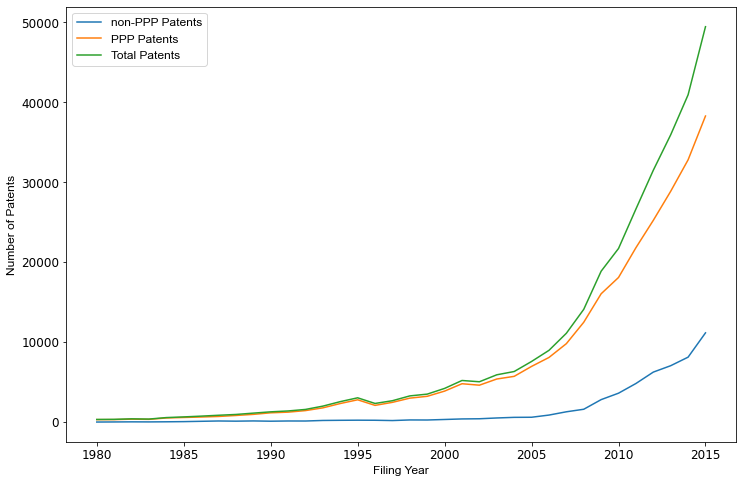

In [114]:
# Set font file path
# font_path = '/data/wangyuhang/ttf/Times New Roman.ttf'
font_path = '/data/wangyuhang/ttf/ARIAL.TTF'

font = FontProperties(fname=font_path, size=12)
# 按年份和 'PPP' 列进行分组，并计算每组的数量
grouped_data = df_patent.groupby(['appln_filing_year', 'PPP']).size().unstack(fill_value=0)
grouped_data = grouped_data[grouped_data.index.isin(range(1980,2021))]
# 计算每年总专利数量和核心专利数量
total_patents_per_year = grouped_data.sum(axis=1)
core_patents_per_year = grouped_data[1]  # 假设 1 表示核心专利

# 绘制折线图和柱状图合一的图
plt.figure(figsize=(12, 8))

# 柱状图
plt.plot(grouped_data.index, grouped_data[0], marker='', label='non-PPP Patents')
plt.plot(grouped_data.index, grouped_data[1], marker='', label='PPP Patents')
plt.plot(grouped_data.index, grouped_data.sum(axis=1), marker='', label='Total Patents')

# 设置图表标题和标签
# plt.title('Total Patents Over Years')
plt.xlabel('Filing Year', fontproperties=font)
plt.ylabel('Number of Patents', fontproperties=font)

# 显示图例
plt.legend(prop=font)

plt.savefig('image/patent_over_year.png', format='png', bbox_inches='tight')

# 显示图表
plt.show()

In [110]:
font.get_family()

['Times New Roman']

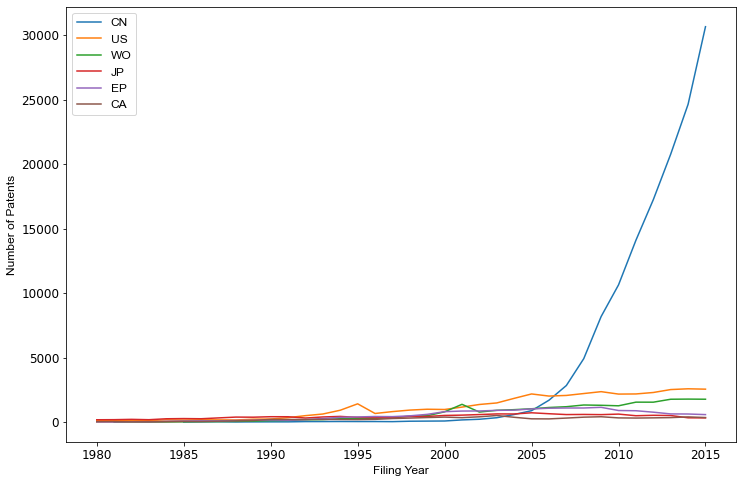

In [115]:
# 按年份和 'PPP' 列进行分组，并计算每组的数量
grouped_data = df_patent.groupby(['appln_auth', 'appln_filing_year', 'PPP']).size().unstack(fill_value=0).reset_index()
grouped_data = grouped_data[grouped_data['appln_filing_year'].isin(range(1980,2021))]

# 计算每年各国总专利数量
total_patents_per_year = grouped_data.groupby(['appln_auth','appln_filing_year']).sum()

# 绘制折线图
plt.figure(figsize=(12, 8))

# 遍历每个国家，绘制折线图
for country in ['CN','US','WO','JP','EP', 'CA']:
    country_data = grouped_data[grouped_data['appln_auth'] == country]
    plt.plot(country_data['appln_filing_year'], country_data[1], marker='', label=country)

# 设置图表标题和标签
# plt.title('PPP Patents Over Years by Country')
plt.xlabel('Filing Year', fontproperties=font)
plt.ylabel('Number of Patents', fontproperties=font)

# 显示图例
plt.legend(prop=font)
plt.savefig('image/PPP Patents Over Years by Country.png', format='png', bbox_inches='tight')

# 显示图表
plt.show()

/tmp/ipykernel_47130/141694534.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(country_data['appln_filing_year'], country_data.sum(axis=1), marker='', label=country)
/tmp/ipykernel_47130/141694534.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(country_data['appln_filing_year'], country_data.sum(axis=1), marker='', label=country)
/tmp/ipykernel_47130/141694534.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  plt.plot(country_data['appln_filing_year'], count

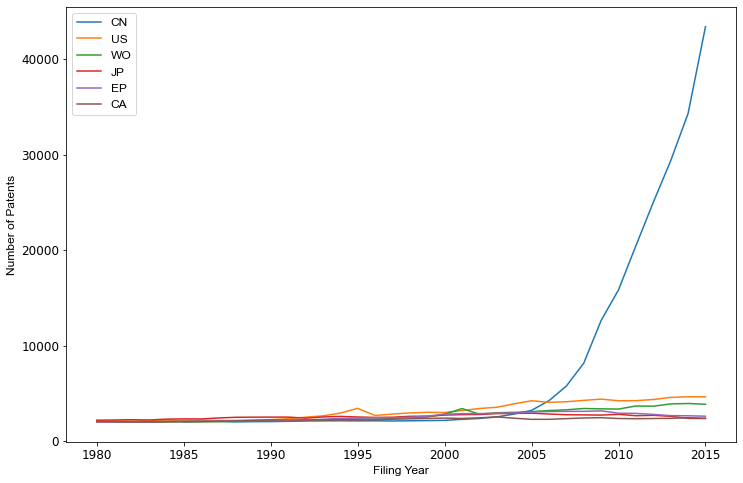

In [116]:
# 按年份和 'PPP' 列进行分组，并计算每组的数量
# 遍历每个国家，绘制折线图
plt.figure(figsize=(12, 8))

for country in ['CN','US','WO','JP','EP', 'CA']:
    country_data = grouped_data[grouped_data['appln_auth'] == country]
    plt.plot(country_data['appln_filing_year'], country_data.sum(axis=1), marker='', label=country)

# 设置图表标题和标签
# plt.title('Total Patents Over Years by Country')
plt.xlabel('Filing Year', fontproperties=font)
plt.ylabel('Number of Patents', fontproperties=font)

# 显示图例
plt.legend(prop=font)
plt.savefig('image/Total Patents Over Years by Country.png', format='png', bbox_inches='tight')

# 显示图表
plt.show()

In [22]:
df_patent['citation_count_5year']=df_patent['citation_count_5year'].fillna(0)

df_patent

,appln_id,person_id,invt_seq_nr,psn_name,psn_id,psn_sector,person_address,title,eid,doi,...,docdb_family_id,inpadoc_family_id,docdb_family_size,nb_citing_docdb_fam,nb_applicants,nb_inventors,citedby_count,cited_appln_id,citation_count_5year,PPP
0,416543665,239,4.0,"SAKAS, GEORGIOS",28185050,None,"Herdweg 81,64285 Darmstadt",Apparatus and method for ultrasound image acqu...,NaN,NaN,...,50424058.0,416543665.0,2.0,6.0,2.0,4.0,NaN,416543665,2.0,1
1,416543665,47124650,1.0,"FORZONI, LEONARDO",9059383,None,"Via Bure Vecchia Sud 11,I-51100 Pistoia",Apparatus and method for ultrasound image acqu...,NaN,NaN,...,50424058.0,416543665.0,2.0,6.0,2.0,4.0,NaN,416543665,2.0,1
2,25,114,2.0,"LI, XIAODONG",19358188,None,"Apt. 3, 3435 Waco Street,San Diego, CA 92117",T1R TASTE RECEPTORS AND GENES ENCODING SAME,NaN,NaN,...,26947173.0,25.0,37.0,78.0,1.0,5.0,NaN,NaN,0.0,1
3,25,117,5.0,"ZOZULYA, SERGEY",37553049,None,"14481 Yazoo Street,San Diego, CA 92129",T1R TASTE RECEPTORS AND GENES ENCODING SAME,NaN,NaN,...,26947173.0,25.0,37.0,78.0,1.0,5.0,NaN,NaN,0.0,1
4,25,115,3.0,"STASZEWSKI, LENA",30934537,None,"8270 Calle Nueva,San Diego, CA 92126",T1R TASTE RECEPTORS AND GENES ENCODING SAME,NaN,NaN,...,26947173.0,25.0,37.0,78.0,1.0,5.0,NaN,NaN,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737660,482247140,69425491,6.0,XU JIE,35924369,INDIVIDUAL,None,Intervention type ultrasonic imaging system wi...,NaN,NaN,...,59459398.0,482247140.0,1.0,1.0,1.0,6.0,NaN,482247140,1.0,0
737710,40228180,72019602,2.0,"CHOI, KANG JU",5040299,None,None,METHOD FOR PRODUCING GINSENOSIDE RG1,NaN,NaN,...,19568950.0,40228180.0,1.0,1.0,1.0,4.0,NaN,NaN,0.0,1
737711,40330252,72715392,1.0,LADAK HANIF M.,18509323,None,None,2 3 PROSTATE BOUNDARY SEGMENTATION FROM 2D AND...,NaN,NaN,...,23474607.0,984262.0,8.0,51.0,1.0,4.0,NaN,NaN,0.0,1
737714,40542850,73249466,4.0,"KANG, TAE CHEON",16310666,None,None,Anticonvulsant containing imperatorin and/or f...,NaN,NaN,...,37334174.0,40542850.0,1.0,2.0,2.0,8.0,NaN,NaN,0.0,1


# time lag

In [23]:
df_ppp=df_ppp.merge(df_patent[['appln_id','appln_filing_date','appln_filing_year','appln_auth']].drop_duplicates('appln_id'),left_on='appln_id',right_on='appln_id',how='left')
df_ppp=df_ppp.merge(df_paper[['eid','coverDate']].drop_duplicates('eid'),left_on='eid',right_on='eid',how='left')


In [25]:
len(df_ppp)

9534029

In [26]:
len(df_ppp)

9534029

In [27]:
df_ppp['time_lag']=df_ppp['coverDate']-df_ppp['appln_filing_date']
df_ppp['time_lag']=df_ppp['time_lag'].apply(lambda x:x.days/365)

/tmp/ipykernel_47130/2594595657.py:1: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  df_ppp['time_lag']=df_ppp['coverDate']-df_ppp['appln_filing_date']


In [28]:
df_time_lag=df_ppp.sort_values(['eid','time_lag'])[['author_id', 'person_id','eid','appln_id','coverDate','appln_filing_date','time_lag']]
df_time_lag=df_time_lag.drop_duplicates(['appln_id', 'person_id'],keep='first')
df_time_lag

,author_id,person_id,eid,appln_id,coverDate,appln_filing_date,time_lag
5143252,35466054000,30985100,2-s2.0-0000000863,39097280,1991-01-01,2005-11-30 00:00:00,-14.923288
2147268,36014450000,16154209,2-s2.0-0000001067,333682295,1997-01-01,2010-10-22 00:00:00,-13.813699
1719931,7202164137,8698596,2-s2.0-0000001069,51662104,1997-01-01,2006-10-03 00:00:00,-9.758904
5802402,7006102710,37002324,2-s2.0-0000001398,45686315,1998-01-01,2003-01-03 00:00:00,-5.008219
5802804,7006102710,37002324,2-s2.0-0000001398,47398978,1998-01-01,1998-08-13 00:00:00,-0.613699
...,...,...,...,...,...,...,...
4891830,7003613740,30811534,2-s2.0-9144253978,439492632,2004-01-16,2013-07-23 00:00:00,-9.523288
842945,36559753100,5757939,2-s2.0-9444267155,47252369,2004-12-24,1994-11-18 00:00:00,10.106849
6255430,7003783500,13094258,2-s2.0-9544227359,45150674,1996-09-26,2002-04-23 00:00:00,-5.575342
3820866,57204257356,16452683,2-s2.0-9944253283,57355815,2005-01-06,2006-10-06 00:00:00,-1.747945


In [29]:
# 先有专利，后有的论文，所以time_lag是正的，选择绝对值最小的，因此是first
df_patent_time_lag=df_time_lag[df_time_lag['time_lag']>0].drop_duplicates(['person_id','appln_id'],keep='first')
df_patent_time_lag

,author_id,person_id,eid,appln_id,coverDate,appln_filing_date,time_lag
5802203,7006102710,5285887,2-s2.0-0000001398,54106902,1998-01-01,1997-08-13 00:00:00,0.386301
5802004,7006102710,5285887,2-s2.0-0000001398,53559340,1998-01-01,1997-02-26 00:00:00,0.846575
5801794,7006102710,5285887,2-s2.0-0000001398,50537007,1998-01-01,1995-02-23 00:00:00,2.857534
3502212,56091532400,19778854,2-s2.0-0000004392,26120397,1987-01-01,1983-02-14 00:00:00,3.882192
3502349,56091532400,19778854,2-s2.0-0000004392,34105658,1987-01-01,1981-12-07 00:00:00,5.071233
...,...,...,...,...,...,...,...
5118725,6507813490,65830600,2-s2.0-8844276846,339830840,2004-12-20,2000-01-12 00:00:00,4.942466
4997607,35411113600,19850480,2-s2.0-9144242925,38186215,2004-01-01,2003-07-14 00:00:00,0.468493
6165923,7102103132,19630091,2-s2.0-9144245598,38222522,2004-01-01,2003-09-05 00:00:00,0.323288
6165926,7102103132,19630091,2-s2.0-9144245598,38222534,2004-01-01,2003-09-05 00:00:00,0.323288


In [120]:
# df_plot=df_patent_time_lag.groupby(
#     [pd.Grouper(key='appln_filing_date', freq='Y',label='left')]).agg(    
#     time_lag_mean=('time_lag','mean')).reset_index()
# plt.figure(figsize=(12, 8)

# # Create your plot using Seaborn
# sns.lineplot(data=df_plot, x='appln_filing_date', y='time_lag_mean')

# # Save the figure
# plt.savefig('image/Time_lag.png', format='png', bbox_inches='tight')

# # Show the plot
# plt.show()

In [31]:
# 先有论文，后有的专利，所以time_lag是负的，选择绝对值最小的，因此是last
df_paper_time_lag=df_time_lag[df_time_lag['time_lag']<0].drop_duplicates(['person_id','eid'],keep='last')
df_paper_time_lag

,author_id,person_id,eid,appln_id,coverDate,appln_filing_date,time_lag
5143252,35466054000,30985100,2-s2.0-0000000863,39097280,1991-01-01,2005-11-30 00:00:00,-14.923288
2147268,36014450000,16154209,2-s2.0-0000001067,333682295,1997-01-01,2010-10-22 00:00:00,-13.813699
1719931,7202164137,8698596,2-s2.0-0000001069,51662104,1997-01-01,2006-10-03 00:00:00,-9.758904
5802606,7006102710,37002324,2-s2.0-0000001398,47384058,1998-01-01,1998-02-26 00:00:00,-0.153425
3930251,36051435500,53423558,2-s2.0-0000002132,443100461,1991-07-01,2015-01-26 00:00:00,-23.589041
...,...,...,...,...,...,...,...
6165914,7102103132,713871,2-s2.0-9144245598,16102761,2004-01-01,2004-08-31 00:00:00,-0.665753
4891830,7003613740,30811534,2-s2.0-9144253978,439492632,2004-01-16,2013-07-23 00:00:00,-9.523288
6255430,7003783500,13094258,2-s2.0-9544227359,45150674,1996-09-26,2002-04-23 00:00:00,-5.575342
3820866,57204257356,16452683,2-s2.0-9944253283,57355815,2005-01-06,2006-10-06 00:00:00,-1.747945


In [32]:
df_paper_time_lag=df_paper_time_lag.merge(df_ppp[['appln_id','appln_auth']],how='left',left_on='appln_id',right_on='appln_id')

In [33]:
five_big=['WO','EP','JP','KOR','CN','US']

In [34]:
df_paper_time_lag.loc[~df_paper_time_lag['appln_auth'].isin(five_big),'appln_auth']='Other'

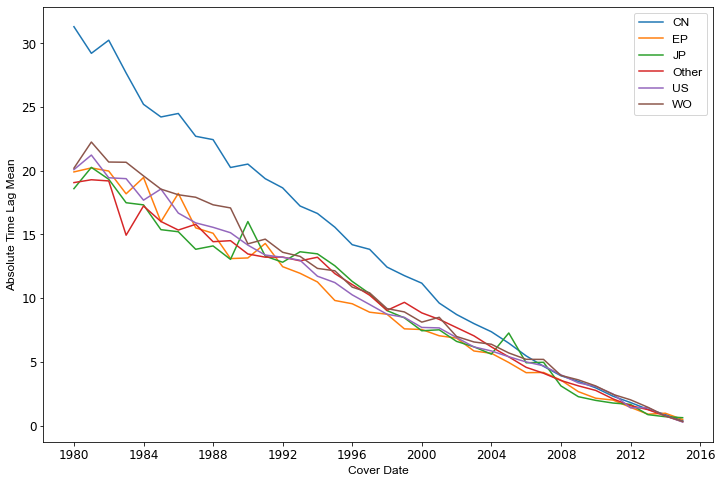

In [121]:
# Grouping and aggregating data
df_plot = df_paper_time_lag.groupby([
    pd.Grouper(key='coverDate', freq='Y', label='left'),
    'appln_auth'
]).agg(time_lag_mean=('time_lag', 'mean')).reset_index()

# Plotting with plt and sns
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_plot, x='coverDate', y=np.abs(df_plot['time_lag_mean']), hue='appln_auth')

# Set plot labels and title
plt.xlabel('Cover Date', fontproperties=font)
plt.ylabel('Absolute Time Lag Mean', fontproperties=font)
# plt.title('Per Nation Time Lag', fontproperties=font)
plt.legend(prop=font)

# Save the figure
plt.savefig('image/per_nation_time_lag.png', format='png', bbox_inches='tight')

# Show the plot
plt.show()

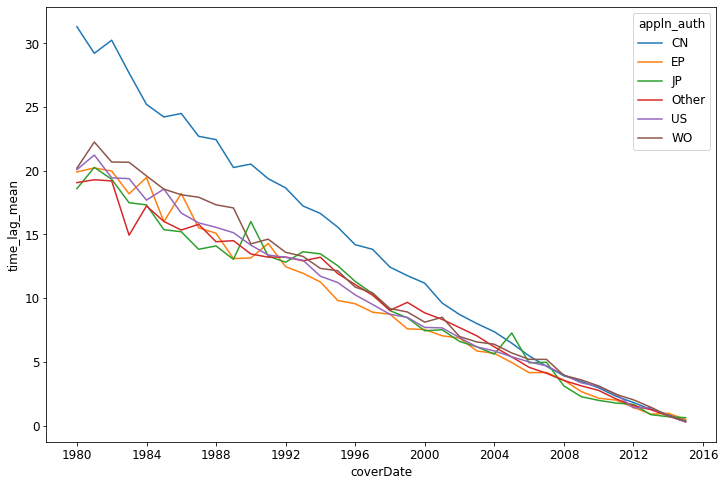

In [122]:
df_plot=df_paper_time_lag.groupby(
    [pd.Grouper(key='coverDate', freq='Y',label='left'),'appln_auth']).agg(    
    time_lag_mean=('time_lag','mean')).reset_index()
df_plot
plt.figure(figsize=(12, 8))

sns.lineplot(df_plot,x='coverDate',y=np.abs(df_plot['time_lag_mean']),hue='appln_auth')
plt.savefig('image/per nation time lag.png', format='png', bbox_inches='tight')


# 卡方检验

In [61]:
print('科学转换的专利五年内平均被引',df_patent[(df_patent['PPP']==1)&(df_patent['appln_id'].notnull())]['citation_count_5year'].mean())
print('非科学转换的专利五年内平均被引',df_patent[(df_patent['PPP']==0)&(df_patent['appln_id'].notnull())]['citation_count_5year'].mean())

print('科学转换的论文五年内平均被引',df_paper[(df_paper['PPP']==1)&(df_paper['eid'].notnull())]['citedby_count'].mean())
print('非科学转换的论文五年内平均被引',df_paper[(df_paper['PPP']==0)&(df_paper['eid'].notnull())]['citedby_count'].mean())

科学转换的专利五年内平均被引 3.018771646783695
非科学转换的专利五年内平均被引 1.6023610280932457
科学转换的论文五年内平均被引 57.56741491904572
非科学转换的论文五年内平均被引 35.69487493969897


In [62]:
from scipy.stats import ranksums

# Perform Wilcoxon rank-sum test
statistic, p_value = ranksums(df_patent[(df_patent['PPP']==1)&(df_patent['appln_id'].notnull())]['citation_count_5year'].to_numpy(), 
                              df_patent[(df_patent['PPP']==0)&(df_patent['appln_id'].notnull())]['citation_count_5year'].to_numpy())

# Output the results
print("Wilcoxon rank-sum statistic:", statistic)
print("P-value:", p_value)

Wilcoxon rank-sum statistic: 41.89232118084066
P-value: 0.0


In [63]:
# Perform Wilcoxon rank-sum test
statistic, p_value = ranksums(df_paper[(df_paper['PPP']==1)&(df_paper['eid'].notnull())]['citedby_count'].to_numpy(), 
                              df_paper[(df_paper['PPP']==0)&(df_paper['eid'].notnull())]['citedby_count'].to_numpy())

# Output the results
print("Wilcoxon rank-sum statistic:", statistic)
print("P-value:", p_value)

Wilcoxon rank-sum statistic: 354.8498377791337
P-value: 0.0


In [64]:
from linearmodels.panel import PanelOLS#
mod = PanelOLS.from_formula("citation_count_5year ~ PPP+docdb_family_size+labels+nb_citing_docdb_fam+nb_applicants+nb_inventors+EntityEffects",
                            data=df_patent.set_index(['person_id',"appln_filing_year"]), check_rank=False)

result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
PPP,0.3514,0.0367,9.5676,0.0000,0.2794,0.4234
docdb_family_size,-0.0643,0.0166,-3.8787,0.0001,-0.0967,-0.0318
labels,7.675e-05,9.802e-06,7.8302,0.0000,5.754e-05,9.596e-05
nb_citing_docdb_fam,0.0817,0.0072,11.351,0.0000,0.0676,0.0958
nb_applicants,0.4916,0.0375,13.103,0.0000,0.4180,0.5651
nb_inventors,0.0281,0.0055,5.1137,0.0000,0.0173,0.0389


In [65]:
df_paper['author_count']=df_paper['author_count'].astype(float).astype(int)
df_paper['openaccess']=df_paper['openaccess'].astype(float).astype(int)


In [66]:
from linearmodels.panel import PanelOLS#
mod = PanelOLS.from_formula("citedby_count ~ PPP+author_count+labels+openaccess+EntityEffects",
                            data=df_paper.set_index(['author_id',"coverDate_year"]), check_rank=False)

result = mod.fit(cov_type='clustered', cluster_entity=True)
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
PPP,15.859,0.2808,56.488,0.0000,15.309,16.410
author_count,1.8305,0.0412,44.414,0.0000,1.7497,1.9113
labels,0.0026,7.193e-05,36.056,0.0000,0.0025,0.0027
openaccess,-1.3621,0.2266,-6.0114,0.0000,-1.8062,-0.9180
